In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler

In [36]:
data = pd.read_csv("fruit_data_with_colours.csv", sep=";")
data

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


# origine : notre dataset prend son origine des differentes caractéristiques des fruits 
# circonstances de création : les données ont été recueillis surement à l'aide d'un google font ou formulaire remplis par des individus
# prévisions : on peut faire des prévisions sur le produit le plus aimé, le plus lourd, le plus long
# bref apercu : les données sont representés sous formes matricielle de dimmension 59*7. Et a premiere vue il y a pas de valeurs manquantes ce qui implique que surement dans le google font c'etait obligé de remplir tous les champs

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [38]:
# sommaire statistique pour les données qui sont pas object

In [39]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [40]:
fruits_name_dict = dict(zip(data['fruit_label'], data['fruit_name']))

In [41]:
fruits_name_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [31]:
# nom de tous les fruits

In [42]:
nom_fruits = data['fruit_name'].unique()
nom_fruits

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
# visualisation

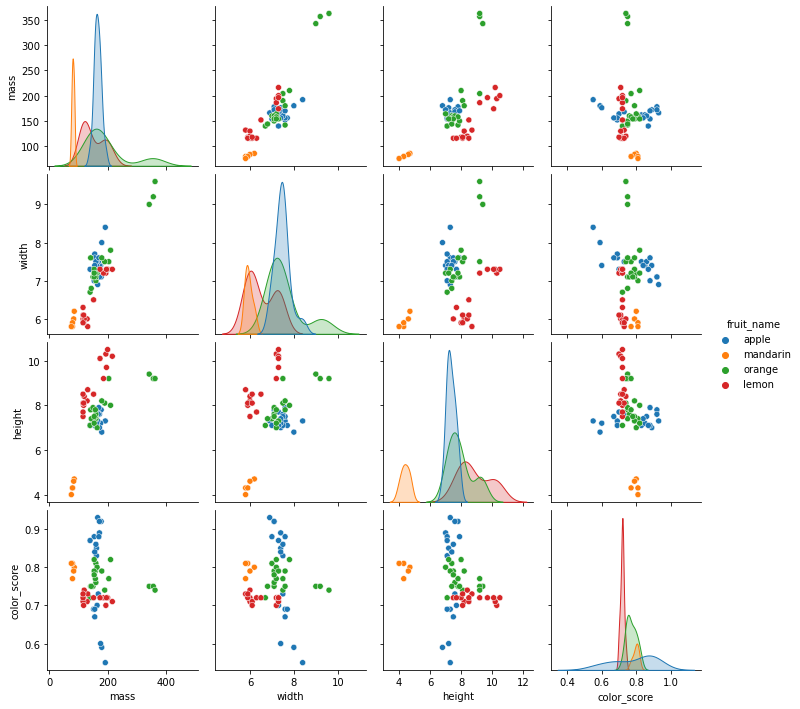

In [43]:
g = sns.pairplot(data = data, hue='fruit_name', vars = ['mass', 'width', 'height', 'color_score'])
plt.savefig('figure_fruits.jpg')

# inteprétation : il s'agit de la matrice de correlation graphique entre les données

#### VUE 3D

In [47]:
Label_color_dict = {1:'red', 2:'green', 3:'blue', 4:'yellow'}

colors = list(map(lambda label: label_color_dict[label],y_train))
print('color=\n', colors)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = colors)

NameError: name 'y_train' is not defined

In [ ]:
# numbers of all fruits

In [48]:
nombres_fruits = data.groupby(data['fruit_name'], sort = False).size()
nombres_fruits

fruit_name
apple       19
mandarin     5
orange      19
lemon       16
dtype: int64

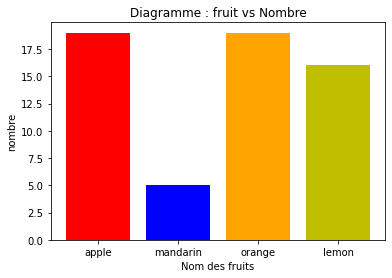

In [52]:
plt.bar(nom_fruits, nombres_fruits, color = ['r', 'blue', 'orange', 'y'])
plt.title('Diagramme : fruit vs Nombre')
plt.xlabel('Nom des fruits')
plt.ylabel('nombre')
plt.savefig('figure_fruit2.jpg')
plt.show()

In [44]:
x = data.iloc[:,[3,4,5,6]].values
y = data.iloc[:,1].values
print(x,y)

[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]
 [ 84.     6.     4.6    0.79]
 [ 80.     5.8    4.3    0.77]
 [ 80.     5.9    4.3    0.81]
 [ 76.     5.8    4.     0.81]
 [178.     7.1    7.8    0.92]
 [172.     7.4    7.     0.89]
 [166.     6.9    7.3    0.93]
 [172.     7.1    7.6    0.92]
 [154.     7.     7.1    0.88]
 [164.     7.3    7.7    0.7 ]
 [152.     7.6    7.3    0.69]
 [156.     7.7    7.1    0.69]
 [156.     7.6    7.5    0.67]
 [168.     7.5    7.6    0.73]
 [162.     7.5    7.1    0.83]
 [162.     7.4    7.2    0.85]
 [160.     7.5    7.5    0.86]
 [156.     7.4    7.4    0.84]
 [140.     7.3    7.1    0.87]
 [170.     7.6    7.9    0.88]
 [342.     9.     9.4    0.75]
 [356.     9.2    9.2    0.75]
 [362.     9.6    9.2    0.74]
 [204.     7.5    9.2    0.77]
 [140.     6.7    7.1    0.72]
 [160.     7.     7.4    0.81]
 [158.     7.1    7.5    0.79]
 [210.     7.8    8.     0.82]
 [164.  

In [ ]:
 # etape 5 : Diviser les données d'entrainement et de test

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# etape 6 : Normalisation des données

# l'objectif de la normalisation est de modifier les valeurs des colonnes numériques d'entrée dans l'ensembe des données  à une echelle commune, sans déformer les differences dans les plages de valeurs.
# Pour l'apprentissage automatique, la normalisation n'est pas necessaire pour chaque ensemble de données. Elle n'est necessaire que lorsque les caractéristiques ont des plages différentes, comme dans notre ensemble de données
# Nous allons utiliser la technique min max la normalisation Min Max est une stratégie de normalisation qui transforme linéairement l'entrée y = (x-min)/(max-min), où min et max sont les valeurs minimum et maximum dans X, où X est l'ensemble des valeurs observées de x. 
# Lorsque x= max, alors y=1. cela signifie que la valeur minimale de x est mise en correspondance avec 0 et que la valeur maximale de x est mise en correspondance avec 1

In [57]:


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Etape 7 : Appeler le classificateur KNN

# permet de classifier les données  en sous-groupe pour les analyser rapidemant 
# plus la methode KNN est grande, plus on a la precision sur la donnée ce qui rend l'algo plus puissante

In [59]:
model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

# Etape 8 : Ajuster le modèle

# L'ajustement d'un modèle signifie que vous faites qu'un algorithme apprenne la relation entre les caractéristiques et les cibles afin de pouvoir prédire les valeurs futures d'une cible

In [61]:
model.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
# Etape 9 : Prédiction pour l'ensemble de données test
# Nous pouvons prédire la classe pour les instances de données de test en utilisant notre modèle de classification finalisé dans scikit-learn à l'aide de la fonction predict()

In [62]:
y_pred = model.predict(x_test)
y_pred

array(['orange', 'orange', 'lemon', 'lemon', 'apple', 'apple', 'apple',
       'lemon', 'orange', 'apple', 'mandarin', 'apple', 'orange',
       'orange', 'apple'], dtype=object)

In [63]:
y_test

array(['orange', 'orange', 'lemon', 'orange', 'apple', 'apple', 'orange',
       'lemon', 'orange', 'apple', 'mandarin', 'apple', 'orange',
       'orange', 'orange'], dtype=object)

In [ ]:
# etape 10 : score de precision et matrice de confusion

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

80.0


In [ ]:
# Le modèle est à 80% d'apprentissage ce qui rend ce modele de machine learning sur ce dataset fiable